<a href="https://colab.research.google.com/github/linukaratnayake/Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Intensity_Transformations_and_Neighborhood_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-7-d729c84af928>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
  assert len(transform) is 256


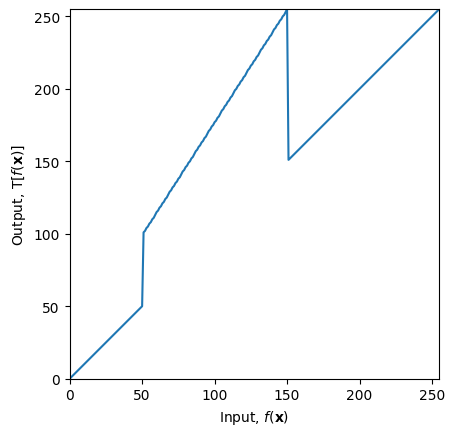

In [7]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1] - 1, c[3,1], c[3,0] - c[2,0]).astype('uint8')
t5 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
assert len(transform) == 256

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

Text(0.5, 1.0, 'Transformed')

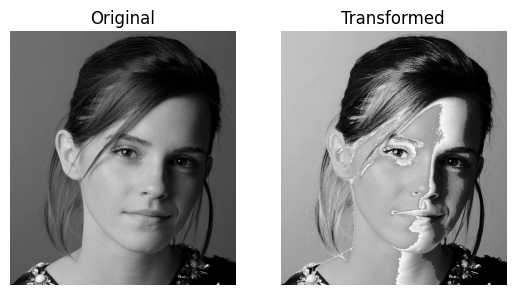

In [10]:
img_orig = cv.imread('/content/drive/My Drive/EN3160/a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

image_transformed = cv.LUT(img_orig, transform)

# Display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(cv.cvtColor(image_transformed, cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title('Transformed')


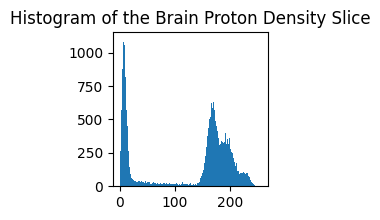

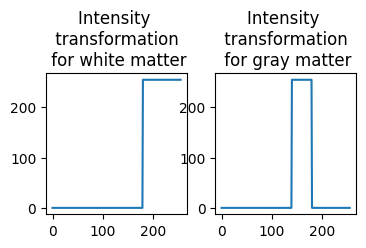

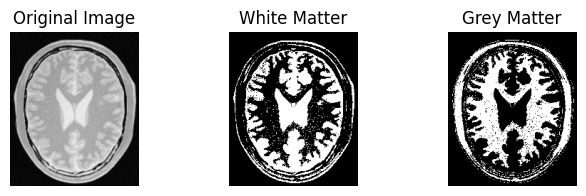

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('/content/drive/My Drive/EN3160/a1images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert image is not None
t1 = np.zeros(180)
t2 = 255 * np.ones(76)
t = np.concatenate((t1, t2), axis=0).astype(np.uint8)

s1 = np.zeros(140)
s2 = 255 * np.ones(40)
s3 = np.zeros(76)
s = np.concatenate((s1, s2, s3), axis=0).astype(np.uint8)

white_matter = cv.LUT(image, t)
gray_matter = cv.LUT(image, s)
plt.figure(figsize=(2, 2))
plt.hist(image.ravel(), 256, [0, 256])
plt.title("Histogram of the Brain Proton Density Slice")
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(4, 4))
ax[0].plot(t), ax[0].set_aspect('equal'), ax[0].set_title("Intensity \n transformation \n for white matter")
ax[1].plot(s), ax[1].set_aspect('equal'), ax[1].set_title("Intensity \n transformation \n for gray matter")
plt.show()

plt.figure(figsize=(8, 2)), plt.subplot(1, 3, 1), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(cv.cvtColor(white_matter, cv.COLOR_BGR2RGB)), plt.axis('off'), plt.title('White Matter')
plt.subplot(1, 3, 3), plt.imshow(cv.cvtColor(gray_matter, cv.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Grey Matter')
plt.show()

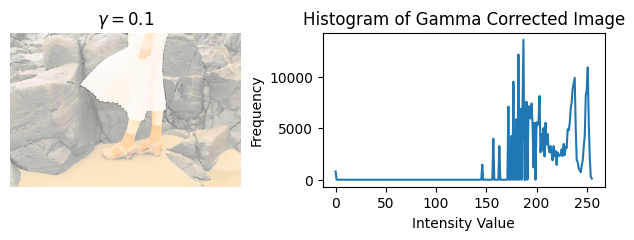

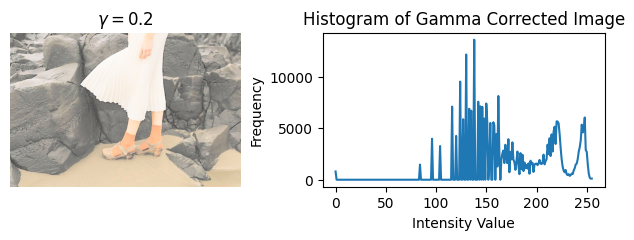

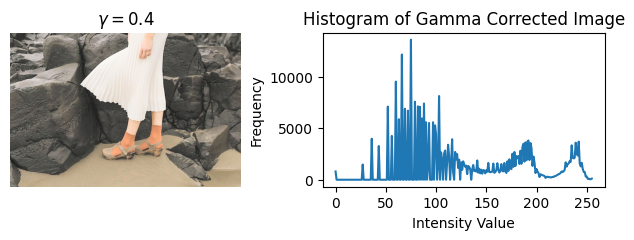

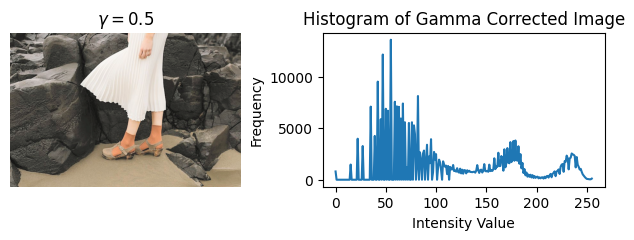

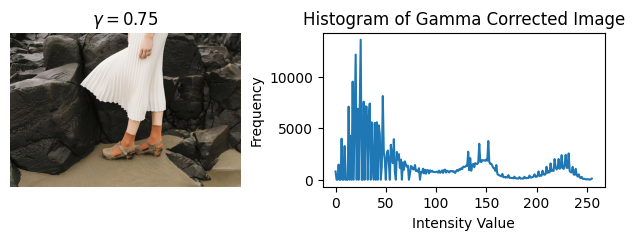

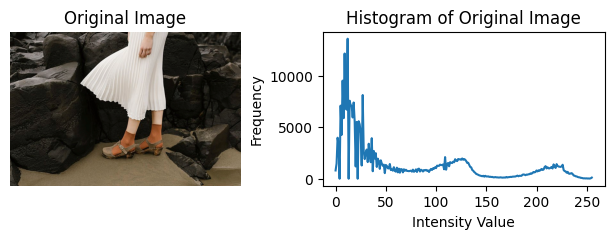

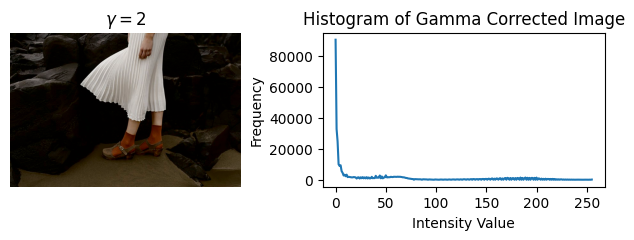

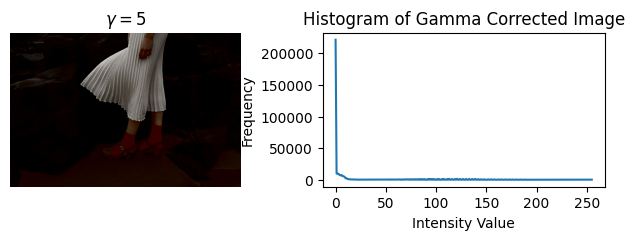

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gamma_values = [0.1, 0.2, 0.4, 0.5, 0.75, 1, 2, 5]
img = cv.imread('/content/drive/My Drive/EN3160/a1images/highlights_and_shadows.jpg')
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB))

for i, gamma in enumerate(gamma_values):
    t = np.array([(i / 255.0) ** gamma * 255 for i in np.arange(0, 256)]).astype(np.uint8)
    g = cv.LUT(L, t)
    corrected_img = cv.merge([g, a, b])

    hist = cv.calcHist([corrected_img], [0], None, [256], [0, 256])
    fig, ax = plt.subplots(1, 2, figsize=(8, 2))
    ax[0].imshow(cv.cvtColor(corrected_img,cv.COLOR_LAB2RGB))

    if gamma == 1:
      ax[0].set_title('Original Image')
    else:
      ax[0].set_title(f'$\gamma = {gamma}$')
    ax[0].axis('off')
    ax[1].plot(hist)

    if gamma==1:
      ax[1].set_title('Histogram of Original Image')
    else:
      ax[1].set_title('Histogram of Gamma Corrected Image')
    ax[1].set_xlabel('Intensity Value')
    ax[1].set_ylabel('Frequency')

    plt.show()

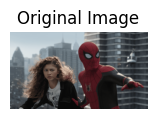

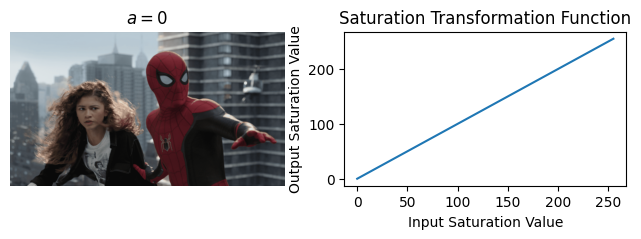

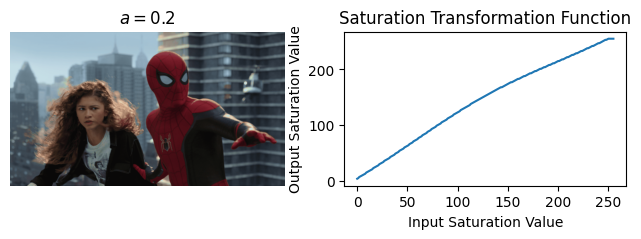

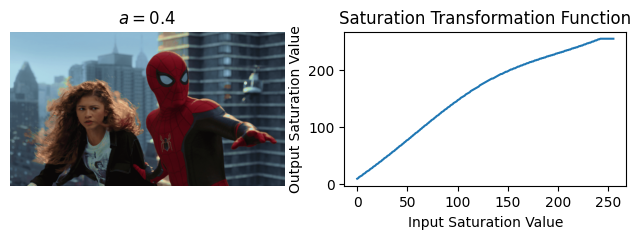

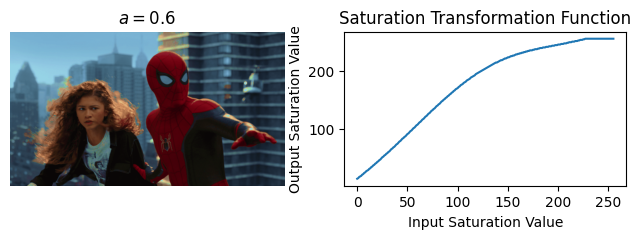

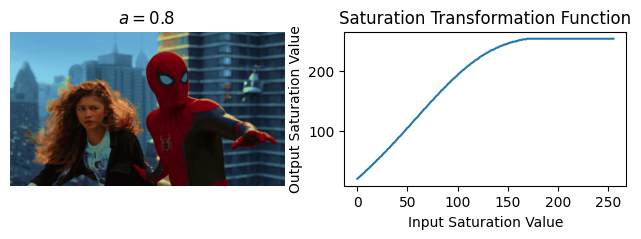

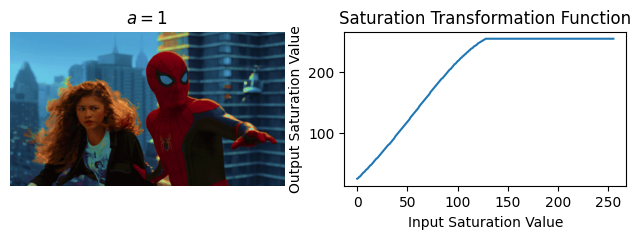

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/My Drive/EN3160/a1images/spider.png')
assert img is not None

plt.figure(figsize=(2, 1))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue, sat, value= cv.split(img_hsv)

sigma = 70
a_values = [0, 0.2, 0.4, 0.6, 0.8, 1]

for a in a_values:
    sat_transformed = np.clip(sat + a * 128 * np.exp(-((sat - 128) ** 2) / (2 * sigma ** 2)), 0, 255).astype(np.uint8)
    vibrant_img = cv.merge([hue, sat_transformed, value]); vibrant_img = cv.cvtColor(vibrant_img, cv.COLOR_HSV2BGR)

    fig, ax = plt.subplots(1, 2, figsize=(8, 2))
    ax[0].imshow(cv.cvtColor(vibrant_img, cv.COLOR_BGR2RGB))
    ax[0].set_title(f'$a = {a}$')
    ax[0].axis('off')

    x_values = np.arange(0, 256)
    y_values = np.clip(x_values + a * 128 * np.exp(-((x_values - 128) ** 2) / (2 * sigma ** 2)), 0, 255).astype(np.uint8)
    ax[1].plot(x_values, y_values)
    ax[1].set_title('Saturation Transformation Function')
    ax[1].set_xlabel('Input Saturation Value')
    ax[1].set_ylabel('Output Saturation Value')
    plt.show()

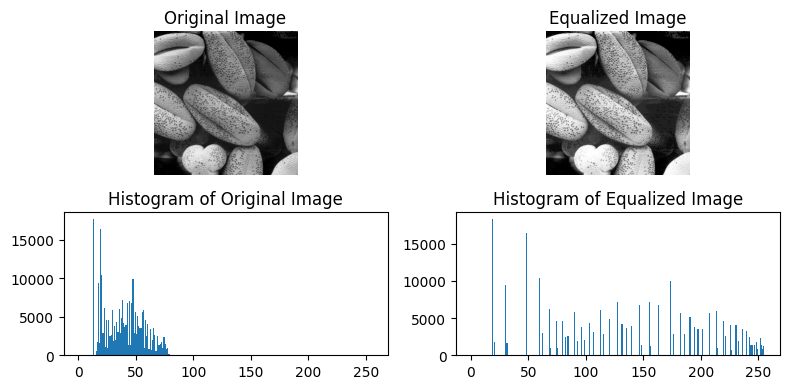

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/My Drive/EN3160/a1images/shells.tif')
assert img is not None
original_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

hist, bins = np.histogram(original_image.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * 255 / cdf[-1]
equalized_image = np.interp(original_image.flatten(), bins[:-1], cdf_normalized)
equalized_image = equalized_image.reshape(original_image.shape).astype(np.uint8)

fig, ax = plt.subplots(2, 2, figsize=(8, 4))
ax[0, 0].imshow(original_image, cmap='gray')
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')
ax[0, 1].imshow(equalized_image, cmap='gray')
ax[0, 1].set_title("Equalized Image")
ax[0, 1].axis('off')
ax[1, 0].hist(original_image.ravel(), bins=256, range=[0, 256])
ax[1, 0].set_title("Histogram of Original Image")
ax[1, 1].hist(equalized_image.ravel(), bins=256, range=[0, 256])
ax[1, 1].set_title("Histogram of Equalized Image")
plt.tight_layout()
plt.show()

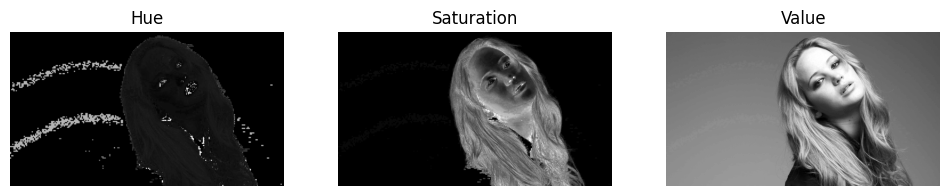

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/My Drive/EN3160/a1images/jeniffer.jpg')
assert img is not None

img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

hue, saturation, value= cv.split(img_hsv)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(hue, cmap='gray')
ax[0].set_title("Hue")
ax[0].axis('off')
ax[1].imshow(saturation, cmap='gray')
ax[1].set_title("Saturation")
ax[1].axis('off')
ax[2].imshow(value, cmap='gray')
ax[2].set_title("Value")
ax[2].axis('off')
plt.show()

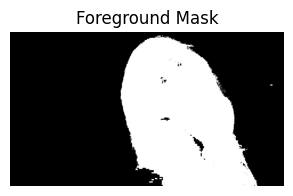

In [20]:
_, mask = cv.threshold(saturation, 11, 255, cv.THRESH_BINARY)
plt.figure(figsize=(4, 2))
plt.imshow(mask, cmap='gray')
plt.title("Foreground Mask")
plt.axis('off')
plt.show()

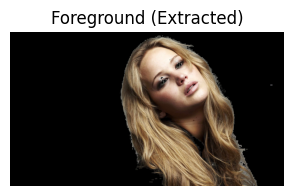

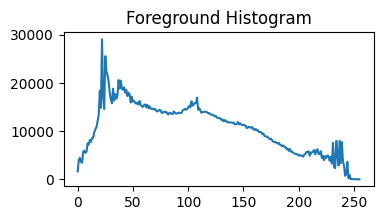

In [22]:
foreground = cv.bitwise_and(cv.cvtColor(img, cv.COLOR_BGR2RGB), cv.cvtColor(img, cv.COLOR_BGR2RGB), mask=mask)
plt.figure(figsize=(6, 2))
plt.imshow(foreground)
plt.title("Foreground (Extracted)")
plt.axis('off')
plt.show()

foreground_converted = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)
hist = cv.calcHist([foreground_converted], [0], mask, [256], [0, 256])

plt.figure(figsize=(4, 2))
plt.plot(hist)
plt.title("Foreground Histogram")
plt.show()

In [23]:
cdf = hist.cumsum()

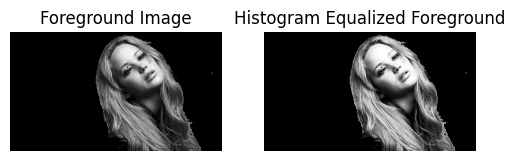

In [25]:
M, N = foreground_converted.shape
L = 256
t = np.zeros(256, dtype=np.uint8)
cdf_min = cdf.min()
cdf_max = cdf.max()

t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)
g = t[foreground_converted]

fig, ax = plt.subplots(1, 2, figsize=(6, 8))
ax[0].imshow(foreground_converted, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Foreground Image')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray')
ax[1].set_title('Histogram Equalized Foreground')
ax[1].axis('off')
plt.show()

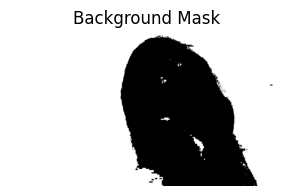

In [26]:
background_mask = cv.bitwise_not(mask)

plt.figure(figsize=(4, 2))
plt.imshow(background_mask, cmap='gray')
plt.title("Background Mask")
plt.axis('off')
plt.show()

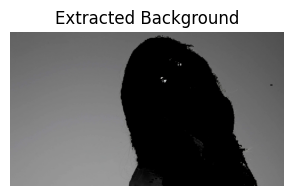

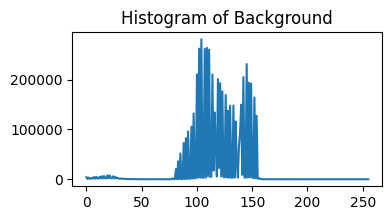

In [28]:
background = cv.bitwise_and(cv.cvtColor(img, cv.COLOR_BGR2RGB), cv.cvtColor(img, cv.COLOR_BGR2RGB), mask=background_mask)

plt.figure(figsize=(6, 2))
plt.imshow(background)
plt.title("Extracted Background")
plt.axis('off')
plt.show()

background_converted = cv.cvtColor(background, cv.COLOR_BGR2GRAY)
hist_back = cv.calcHist([background_converted], [0], background_mask, [256], [0, 256])

plt.figure(figsize=(4,2));plt.plot(hist_back);plt.title("Histogram of Background");plt.show()

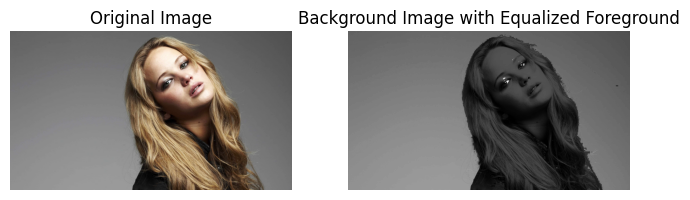

In [29]:
result = cv.add(g, cv.cvtColor(background, cv.COLOR_BGR2GRAY))

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(result, cmap='gray')
ax[1].set_title("Background Image with Equalized Foreground")
ax[1].axis('off')
plt.show()

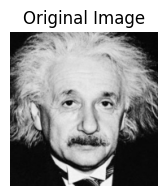

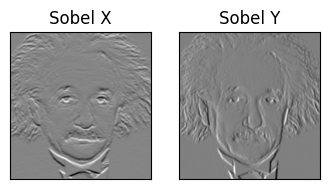

In [31]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im = cv.imread('/content/drive/My Drive/EN3160/a1images/einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

im_x = cv.filter2D(im, cv.CV_64F, sobel_x)
im_y = cv.filter2D(im, cv.CV_64F, sobel_y)

plt.figure(figsize=(4,2))
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(4,2))
ax[0].imshow(im_x, cmap='gray')
ax[0].set_title('Sobel X')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()

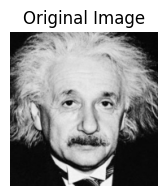

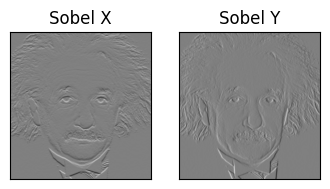

In [32]:
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/My Drive/EN3160/a1images/einstein.png')
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY).astype(float)

x_edge = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
y_edge = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)

edge = np.sqrt(x_edge**2+y_edge**2)

plt.figure(figsize=(4,2))
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(4,2))
axes[0].imshow(y_edge, cmap='gray', vmin=-1020, vmax=1020), axes[0].set_title('Sobel X')
axes[1].imshow(x_edge, cmap='gray', vmin=-1020, vmax=1020), axes[1].set_title('Sobel Y'), axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

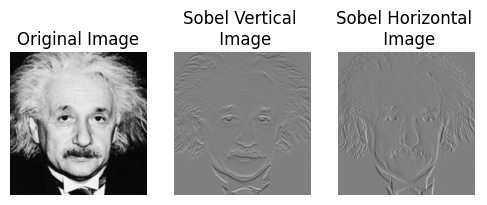

In [34]:
import cv2 as cv
import numpy as np

im = cv.imread('/content/drive/My Drive/EN3160/a1images/einstein.png')
im = cv.cvtColor(im,cv.COLOR_BGR2GRAY).astype(float)

sobel_h_kernel = np.array([1,2,1], dtype=np.float32)
sobel_v_kernel = np.array([1,0,-1], dtype=np.float32)

im1 = cv.sepFilter2D(im, -1, sobel_h_kernel, sobel_v_kernel)
im2 = cv.sepFilter2D(im, -1, sobel_v_kernel, sobel_h_kernel)

fig, ax = plt.subplots(1, 3, figsize=(6,12))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(im1, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("Sobel Vertical \n Image")
ax[1].axis("off")
ax[2].imshow(im2, cmap='gray', vmin=-1020, vmax=1020)
ax[2].set_title("Sobel Horizontal \n Image")
ax[2].axis("off")
plt.show()

Nearest-neighbor normalized sum of squared difference SSD: 136.26904899691357
Bilinear interpolation normalized sum of squared difference SSD: 115.0919012024177


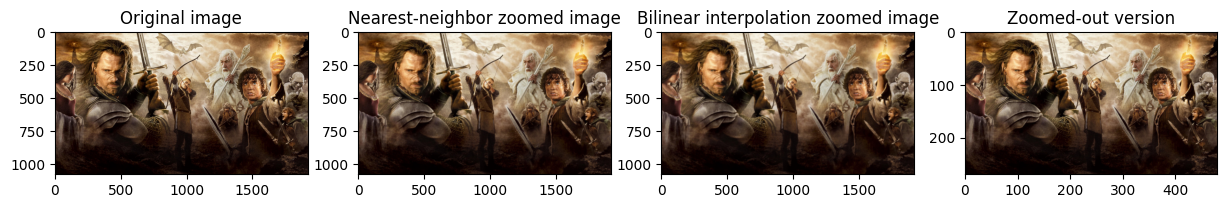

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img1 = cv.imread('/content/drive/My Drive/EN3160/a1images/a1q5images/im01.png')
assert img1 is not None

small_img1 = cv.imread('/content/drive/My Drive/EN3160/a1images/a1q5images/im01small.png')
assert small_img1 is not None

near_img = cv.resize(small_img1, None, fx=4, fy=4, interpolation=cv.INTER_NEAREST)
bilinear_img = cv.resize(small_img1, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR)

ssd_nearest = (np.sum((img1.astype("float") - near_img.astype("float")) ** 2)) / img1.size
ssd_bilinear = (np.sum((img1.astype("float") - bilinear_img.astype("float")) ** 2)) / img1.size

print(f"Nearest-neighbor normalized sum of squared difference SSD: {ssd_nearest}")
print(f"Bilinear interpolation normalized sum of squared difference SSD: {ssd_bilinear}")

fig, ax = plt.subplots(1, 4, figsize=(15, 15))
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")
ax[1].imshow(cv.cvtColor(near_img, cv.COLOR_BGR2RGB))
ax[1].set_title("Nearest-neighbor zoomed image")
ax[2].imshow(cv.cvtColor(bilinear_img, cv.COLOR_BGR2RGB))
ax[2].set_title("Bilinear interpolation zoomed image")
ax[3].imshow(cv.cvtColor(small_img1, cv.COLOR_BGR2RGB))
ax[3].set_title("Zoomed-out version")
plt.show()

Nearest-neighbor normalized sum of squared difference SSD: 26.446087384259258
Bilinear interpolation normalized sum of squared difference SSD: 18.34591767939815


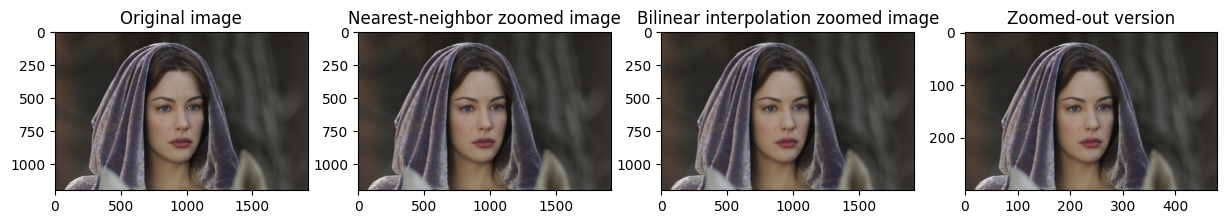

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img2 = cv.imread('/content/drive/My Drive/EN3160/a1images/a1q5images/im02.png')
assert img2 is not None
small_img2 = cv.imread('/content/drive/My Drive/EN3160/a1images/a1q5images/im02small.png')
assert small_img2 is not None

near_img2 = cv.resize(small_img2, None, fx=4, fy=4, interpolation=cv.INTER_NEAREST)
bilinear_img2 = cv.resize(small_img2, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR)

ssd_nearest = (np.sum((img2.astype("float") - near_img2.astype("float")) ** 2)) / img2.size
ssd_bilinear = (np.sum((img2.astype("float") - bilinear_img2.astype("float")) ** 2)) / img2.size

print(f"Nearest-neighbor normalized sum of squared difference SSD: {ssd_nearest}")
print(f"Bilinear interpolation normalized sum of squared difference SSD: {ssd_bilinear}")

fig, ax = plt.subplots(1, 4, figsize=(15, 15))
ax[0].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")
ax[1].imshow(cv.cvtColor(near_img2, cv.COLOR_BGR2RGB))
ax[1].set_title("Nearest-neighbor zoomed image")
ax[2].imshow(cv.cvtColor(bilinear_img2, cv.COLOR_BGR2RGB))
ax[2].set_title("Bilinear interpolation zoomed image")
ax[3].imshow(cv.cvtColor(small_img2, cv.COLOR_BGR2RGB))
ax[3].set_title("Zoomed-out version")
plt.show()

(-0.5, 560.5, 840.5, -0.5)

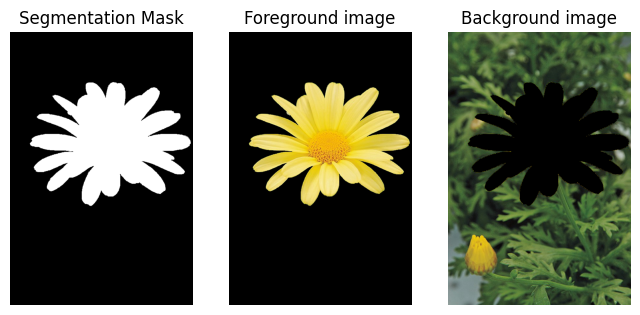

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/My Drive/EN3160/a1images/daisy.jpg')
mask = np.zeros(img.shape[:2], np.uint8)

background_model = np.zeros((1,65), np.float64)
foreground_model = np.zeros((1,65), np.float64)

rectangle = (50, 50, 505, 505)
cv.grabCut(img, mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)

mask1 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
img1 = img * mask1[:, :, np.newaxis]

fig, ax = plt.subplots(1, 3, figsize = (8, 8))
ax[0].imshow(mask1, cmap='gray')
ax[0].set_title("Segmentation Mask")
ax[0].axis("off")
ax[1].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground image")
ax[1].axis("off")

cv.grabCut(img, mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==3)|(mask==1), 0, 1).astype('uint8')
img2 = img * mask2[:, :, np.newaxis]
ax[2].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[2].set_title("Background image")
ax[2].axis("off")

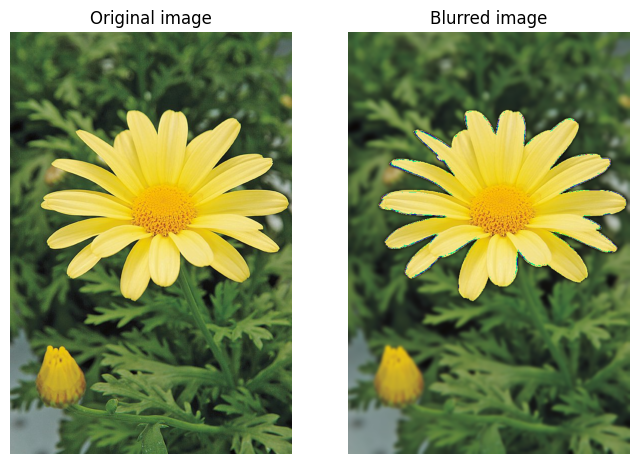

In [18]:
blurred_img = img1 + cv.GaussianBlur(img2, (15, 15), 0)

fig, ax = plt.subplots(1, 2, figsize = (8, 8))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")
ax[0].axis("off")
ax[1].imshow(cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB))
ax[1].set_title("Blurred image")
ax[1].axis("off")
plt.show()